In [2]:
cd ~/DATA/Sentinel/ 

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [3]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from smoothn import *
import pylab as plt
%matplotlib inline
import mgrs
import pandas as pd
from scipy import interpolate
from nicer_plot import *

In [80]:
data = parallel_rw_pkl(None, 'Luang0412_atm', 'r')
lat, lon = 20.930833,101.415830
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
imgx,imgy

(8360, 5125)

In [81]:
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-8001).astype(int), (aerosols[1]-5001).astype(int)] = aerosols[2]

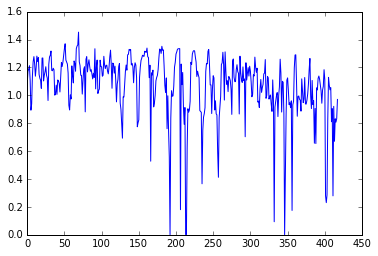

In [82]:
plt.plot(aerosols[2])

In [83]:
aerosols[2].mean()

1.0712166503616609

In [84]:
weight = ((aero_map>(np.nanmean(aerosols[2])-np.nanstd(aerosols[2]))) & (aero_map<(np.nanmean(aerosols[2])+np.nanstd(aerosols[2])))).astype(int)

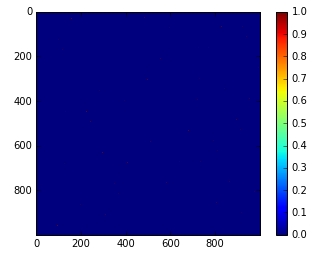

In [85]:
plt.imshow(weight)
plt.colorbar()

In [86]:
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, verbose=True, isrobust=True)

tol 1.0 nit 0
tol 2.34111487443 nit 1
tol 2.09957257587 nit 2
tol 1.99254327969 nit 3
tol 1.45063808624 nit 4
tol 1.14563733919 nit 5
tol 0.767169390905 nit 6
tol 0.548508198192 nit 7
tol 0.380308099675 nit 8
tol 0.267044287664 nit 9
tol 0.195960047286 nit 10
tol 0.139938547642 nit 11
tol 0.1099135503 nit 12
tol 0.082351402078 nit 13
tol 0.0698870462836 nit 14
tol 0.0563937877237 nit 15
tol 0.0510870319025 nit 16
tol 0.044286713002 nit 17
tol 0.0416276153345 nit 18
tol 0.037877053867 nit 19
tol 0.0361727497953 nit 20
tol 0.0338385501754 nit 21
tol 0.0325361040809 nit 22
tol 0.0309173016923 nit 23
tol 0.0298407674576 nit 24
tol 0.0286250542111 nit 25
tol 0.027708869141 nit 26
tol 0.0267443762739 nit 27
tol 0.0259544573036 nit 28
tol 0.0251594473633 nit 29
tol 0.0244720775567 nit 30
tol 0.0237983146981 nit 31
tol 0.0231948313999 nit 32
tol 0.0226116673561 nit 33
tol 0.0220770128424 nit 34
tol 0.0215638461895 nit 35
tol 0.0210859203242 nit 36
tol 0.0206282978964 nit 37
tol 0.0201974480311

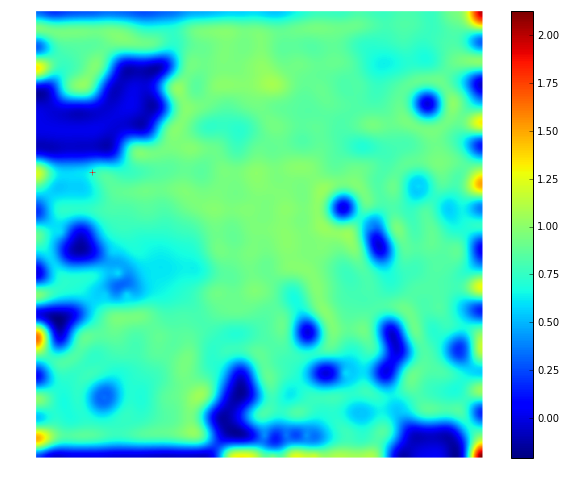

In [89]:
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(125,360 ,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()

In [95]:
sm_aaro[0][359, 124]

0.067830738846773403

In [ ]:
0.067830738846773403, 1.3515